Author: Louis Owen (https://louisowen6.github.io/)

In [1]:
from newspaper import Article
import newspaper

import pandas as pd
import re
import matplotlib.pyplot as plt

# Data Gathering

In [2]:
urls_dict = {'history':
               [
               'https://historia.id/histeria/articles/sri-sultan-es-puter-dan-pedagang-beras-6mJKx',
               'https://historia.id/histeria/articles/kebersahajaan-sri-sultan-hamengkubuwono-ix-6aly2/page/2',
               'https://historia.id/histeria/articles/safari-ahmad-subardjo-di-uni-soviet-DrR1x',
               'https://historia.id/histeria/articles/lambaian-jenderal-tapol-6lglE',
               'https://historia.id/histeria/articles/kemal-idris-terhipnotis-marilyn-monroe-di-paris-PdbEk',
               'https://historia.id/histeria/articles/jajanan-tiga-bapak-bangsa-DEa4X',
               'https://historia.id/histeria/articles/pesta-ulang-tahun-yang-gagal-DAZgg',
               'https://historia.id/histeria/articles/bung-karno-dan-para-pelayannya-6mJxr',
               'https://historia.id/histeria/articles/bung-hatta-dan-minuman-keras-vYMw8'
               ],
             'economy':
               [
               'https://muttaq.in/program-kartu-prakerja-tidak-targeted-dan-sebuah-pemborosan/',
               'https://muttaq.in/digitalisasi-ekonomi-dan-big-data-usaha-mikro-kecil-untuk-pemulihan-ekonomi/',
               'https://muttaq.in/suramnya-sektor-pertambangan-kalimantan-selatan-di-era-pandemi-covid-19/',
               'https://muttaq.in/mengapa-tingkat-pengangguran-terbuka-di-perkotaan-tinggi/',
               'https://muttaq.in/bagaimanakah-ekonomi-islam-mensejahterakan-dunia/',
               'https://muttaq.in/membangun-ekonomi-rumah-tangga-islami/',
               'https://muttaq.in/ada-apa-di-balik-perang-dagang-as-china/'
               ],
             'covid19':
              [
               'https://muttaq.in/laju-penyebaran-covid-19-kalimantan-selatan-didorong-kaum-milenial/',
               'https://muttaq.in/pandemi-covid-19-banjarmasin-yang-semakin-mengkhawatirkan/',
               'https://muttaq.in/pentingnya-inovasi-di-tengah-langkah-berat-perekonomian-indonesia-pada-masa-pandemi-covid-19/',
               'https://muttaq.in/kebijakan-pembatasan-mobilitas-penduduk-yang-terlambat-dan-setengah-hati/',
               'https://muttaq.in/penanganan-pandemi-covid-19-indonesia-semakin-tidak-terarah-dengan-rencana-pembukaan-sekolah/',
               'https://muttaq.in/melemahnya-tes-covid-19-di-tengah-pilkada-dan-pelonggaran-ekonomi/',
               'https://muttaq.in/situasi-pandemi-covid-19-indonesia-31-maret-jangan-santuy-pandemi-belum-terkendali/',
               'https://muttaq.in/sebanyak-358-anak-usia-pendidikan-dasar-di-kalsel-terpapar-covid-19-pada-bulan-maret/',
              ],
             'geography':
             [
               'https://id.wikipedia.org/wiki/Oseanografi',
               'https://id.wikipedia.org/wiki/Geomorfologi',
               'https://id.wikipedia.org/wiki/Erosi',
               'https://id.wikipedia.org/wiki/Biogeografi',
               'https://id.wikipedia.org/wiki/Geografi_pembangunan',
               'https://id.wikipedia.org/wiki/Geostrategi',
             ],
             'environment':
             [
               'https://id.wikipedia.org/wiki/Energi_terbarukan#:~:text=Energi%20terbarukan%20adalah%20energi%20yang,proses%20biologi%2C%20dan%20panas%20bumi.',
               'https://id.wikipedia.org/wiki/Penghapusan_bertahap_bahan_bakar_fosil',
               'https://id.wikipedia.org/wiki/Efisiensi_energi',
               'https://id.wikipedia.org/wiki/Penyimpanan_energi',
               'https://id.wikipedia.org/wiki/Mikrogenerasi',
               'https://id.wikipedia.org/wiki/Pemanasan_global',
               'https://id.wikipedia.org/wiki/Siklus_karbon',
               'https://id.wikipedia.org/wiki/Pengelolaan_sampah',
               'https://coaction.id/en/green-jobs-peluang-kekinian-demi-sekepal-asa-kemakmuran-masa-depan/',
               'https://coaction.id/en/meningkatkan-ambisi-target-nationally-determined-contribution-ndc-melalui-percepatan-energi-terbarukan/',
               'https://coaction.id/en/dari-panas-perut-bumi-lahirlah-listrik/',
             ],
             'technology':
             [
               'https://id.wikipedia.org/wiki/RMS_Titanic',
               'https://id.wikipedia.org/wiki/Teknologi_pencari',
               'https://id.wikipedia.org/wiki/Dasar_sistem_keamanan_komputer',
               'https://id.wikipedia.org/wiki/Jaringan_komputer',
               'https://id.wikipedia.org/wiki/Kecerdasan_buatan',
               'https://id.wikipedia.org/wiki/Algoritme_genetik',
               'https://id.wikipedia.org/wiki/Algoritme',
             ],
             'health':
             [
               'https://www.cnnindonesia.com/gaya-hidup/20210415090544-255-630207/buka-jendela-cara-penting-cegah-penularan-covid-19',
               'https://www.cnnindonesia.com/gaya-hidup/20210415133842-255-630337/cara-meningkatkan-produksi-asi-saat-ibu-berpuasa',
               'https://www.cnnindonesia.com/gaya-hidup/20210416162255-255-630924/bahaya-meminum-air-yang-terpapar-radiasi-bagi-kesehatan',
               'https://www.cnnindonesia.com/gaya-hidup/20210416080107-255-630648/7-manfaat-jagung-muda-obat-darah-tinggi',
               'https://www.cnnindonesia.com/gaya-hidup/20210415072741-255-630166/7-manfaat-semangka-untuk-kesehatan-tubuh-anda',
               'https://www.cnnindonesia.com/gaya-hidup/20210409073052-255-627728/8-penyebab-wajah-asimetris-yang-tak-disadari',
               'https://www.cnnindonesia.com/gaya-hidup/20210408142621-255-627489/herpes-zoster-penyebab-gejala-dan-pencegahan'   
             ],
             'biology':
             [
               'https://id.wikipedia.org/wiki/Paus_biru',
               'https://id.wikipedia.org/wiki/Biomolekul',
               'https://id.wikipedia.org/wiki/Pengantar_genetika',
               'https://id.wikipedia.org/wiki/Keanekaragaman_hayati',
               'https://id.wikipedia.org/wiki/Antibiotik',
               'https://id.wikipedia.org/wiki/Simbiosis',
               'https://id.wikipedia.org/wiki/Pengantar_evolusi'
             ],
             'chemistry':
             [
               'https://id.wikipedia.org/wiki/Asam_asetat',
               'https://id.wikipedia.org/wiki/Atom',
               'https://id.wikipedia.org/wiki/Hukum_kekekalan_massa',
               'https://id.wikipedia.org/wiki/Biokimia',
               'https://id.wikipedia.org/wiki/Kimia_organik',
               'https://id.wikipedia.org/wiki/Farmasi',
               'https://id.wikipedia.org/wiki/Elektrolisis'
             ],
            }

In [3]:
article_dict = {'category':{},'author':{},'publish_date':{},'text':{},'url':{}}
idx = 0
for category in urls_dict:
    for url  in urls_dict[category]:
        article = Article(url)
        article.download()
        article.parse()
        article_dict['category'][idx] = category
        article_dict['author'][idx] = article.authors
        article_dict['publish_date'][idx] = article.publish_date
        article_dict['text'][idx] = article.text
        article_dict['url'][idx] = url
        
        idx += 1

In [4]:
df_article = pd.DataFrame(article_dict)

In [5]:
df_article

,category,author,publish_date,text,url
0,history,[],2021-04-10 17:00:00.012000+07:00,SUATU senja di tahun 1946. Kereta Api Luar Bia...,https://historia.id/histeria/articles/sri-sult...
1,history,[],2021-04-09 19:21:15.718000+07:00,BERTANYALAH ke para sepuh di Yogyakarta: siapa...,https://historia.id/histeria/articles/kebersah...
2,history,[],2021-04-02 12:00:29.994000+07:00,"Pada suatu pagi di bulan Oktober 1927, sebuah ...",https://historia.id/histeria/articles/safari-a...
3,history,[],2021-03-23 17:27:16.715000+07:00,Rumah Tahanan Nirbaya yang terletak di kawasan...,https://historia.id/histeria/articles/lambaian...
4,history,[],2021-03-20 21:26:18.815000+07:00,Di tengah kegalauannya akibat beberapa rencana...,https://historia.id/histeria/articles/kemal-id...
...,...,...,...,...,...
64,chemistry,[],None,Hukum kekekalan massa merupakan massa yang dap...,https://id.wikipedia.org/wiki/Hukum_kekekalan_...
65,chemistry,[],None,"Biokimia atau kimia biologis, adalah ilmu yang...",https://id.wikipedia.org/wiki/Biokimia
66,chemistry,[],None,Struktur dari molekul metana : ikatan hidrokar...,https://id.wikipedia.org/wiki/Kimia_organik
67,chemistry,[],None,"XIV\n\nFarmasi (bahasa Inggris: pharmacy, baha...",https://id.wikipedia.org/wiki/Farmasi


# Data Cleaning

In [6]:
def clean_historia_web_data(text):
    # Remove Double New Lines
    filtered_text = re.sub(r'\n{2,}', '\n', text)
    
    return filtered_text


def clean_muttaq_web_data(text):
    splitted_text = text.split('\n\n')
    
    # Remove 'Oleh' and 'Sumber' from text
    filtered_splitted_text = [x for x in splitted_text if ('oleh' not in x.lower()) and ('sumber' not in x.lower())]
    filtered_text = '\n\n'.join(filtered_splitted_text)
    
    # Remove '[]' at the end of the text
    filtered_text = '.'.join(filtered_text.split('.')[:-1])
    
    # Remove Double New Lines
    filtered_text = re.sub(r'\n{2,}', '\n', filtered_text)
    
    return filtered_text


def clean_wikipedia_web_data(text):
    splitted_text = text.split('\n\n')

    # Remove 'sunting sumber' and 'Editor' from text
    filtered_splitted_text = [x for x in splitted_text if 'sunting sumber' not in x.lower()]
    filtered_text = '\n\n'.join(filtered_splitted_text)
    
    # Remove Brackets
    filtered_text = re.sub(r'\[.*?\]+', '', filtered_text)
    
    # Remove Double New Lines
    filtered_text = re.sub(r'\n{2,}', '\n', filtered_text)
    
    # Remove part starting from "lihat pula"
    filtered_text = filtered_text.split('lihat pula')[0].strip()
    filtered_text = filtered_text.split('Lihat pula')[0].strip()
    filtered_text = filtered_text.split('Lihat Pula')[0].strip()
    filtered_text = filtered_text.split('lihat juga')[0].strip()
    filtered_text = filtered_text.split('Lihat juga')[0].strip()
    filtered_text = filtered_text.split('Lihat Juga')[0].strip()
    
    return filtered_text


def clean_coaction_web_data(text):
    splitted_text = text.split('\n\n')
    
    # Remove 'Penulis' and 'Editor' from text
    filtered_splitted_text = [x for x in splitted_text if ('penulis' not in x.lower()) and ('editor' not in x.lower())]
    filtered_text = '\n\n'.join(filtered_splitted_text)
    
    # Remove Double New Lines
    filtered_text = re.sub(r'\n{2,}', '\n', filtered_text)
    
    return filtered_text


def clean_cnn_web_data(text):
    splitted_text = text.split('\n\n')
    
    # Remove 'Penulis' and 'Editor' from text
    filtered_splitted_text = splitted_text[1:]
    filtered_text = '\n\n'.join(filtered_splitted_text)
    
    # Remove Double New Lines
    filtered_text = re.sub(r'\n{2,}', '\n', filtered_text)
    
    return filtered_text


def clean_agg_data(row):
    if 'historia' in row['url']:
        return clean_historia_web_data(row['text'])
    elif 'muttaq' in row['url']:
        return clean_muttaq_web_data(row['text'])
    elif 'wikipedia' in row['url']:
        return clean_wikipedia_web_data(row['text'])
    elif 'coaction' in row['url']:
        return clean_coaction_web_data(row['text'])
    elif 'cnn' in row['url']:
        return clean_cnn_web_data(row['text'])

In [7]:
df_article['clean_text'] = df_article.apply(lambda x: clean_agg_data(x),axis=1)
df_article['len_chars'] = df_article['clean_text'].apply(lambda x: len(x))

In [8]:
df_article

,category,author,publish_date,text,url,clean_text,len_chars
0,history,[],2021-04-10 17:00:00.012000+07:00,SUATU senja di tahun 1946. Kereta Api Luar Bia...,https://historia.id/histeria/articles/sri-sult...,SUATU senja di tahun 1946. Kereta Api Luar Bia...,4949
1,history,[],2021-04-09 19:21:15.718000+07:00,BERTANYALAH ke para sepuh di Yogyakarta: siapa...,https://historia.id/histeria/articles/kebersah...,BERTANYALAH ke para sepuh di Yogyakarta: siapa...,3725
2,history,[],2021-04-02 12:00:29.994000+07:00,"Pada suatu pagi di bulan Oktober 1927, sebuah ...",https://historia.id/histeria/articles/safari-a...,"Pada suatu pagi di bulan Oktober 1927, sebuah ...",6140
3,history,[],2021-03-23 17:27:16.715000+07:00,Rumah Tahanan Nirbaya yang terletak di kawasan...,https://historia.id/histeria/articles/lambaian...,Rumah Tahanan Nirbaya yang terletak di kawasan...,6422
4,history,[],2021-03-20 21:26:18.815000+07:00,Di tengah kegalauannya akibat beberapa rencana...,https://historia.id/histeria/articles/kemal-id...,Di tengah kegalauannya akibat beberapa rencana...,3983
...,...,...,...,...,...,...,...
64,chemistry,[],None,Hukum kekekalan massa merupakan massa yang dap...,https://id.wikipedia.org/wiki/Hukum_kekekalan_...,Hukum kekekalan massa merupakan massa yang dap...,4066
65,chemistry,[],None,"Biokimia atau kimia biologis, adalah ilmu yang...",https://id.wikipedia.org/wiki/Biokimia,"Biokimia atau kimia biologis, adalah ilmu yang...",26559
66,chemistry,[],None,Struktur dari molekul metana : ikatan hidrokar...,https://id.wikipedia.org/wiki/Kimia_organik,Struktur dari molekul metana : ikatan hidrokar...,3987
67,chemistry,[],None,"XIV\n\nFarmasi (bahasa Inggris: pharmacy, baha...",https://id.wikipedia.org/wiki/Farmasi,"XIV\nFarmasi (bahasa Inggris: pharmacy, bahasa...",2886


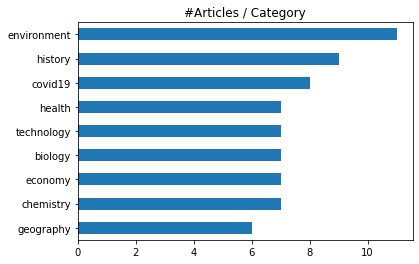

In [9]:
df_article['category'].value_counts().sort_values().plot(kind='barh')
plt.title('#Articles / Category')
plt.show()

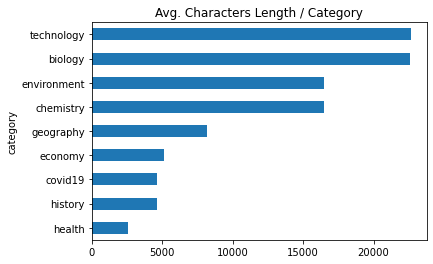

In [10]:
df_article.groupby('category').mean()['len_chars'].sort_values().plot(kind='barh')
plt.title('Avg. Characters Length / Category')
plt.show()

In [14]:
df_article.to_csv('../data/articles_data.tsv',sep='\t',index=False)

# Frequency Stopwords Extraction

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

thres = 0.55
stopwords = []

for category in df_article['category'].unique():
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df_article[df_article['category']==category]['clean_text'].to_list())

    word_freq = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
    word_freq_sum = word_freq.sum(axis=0).sort_values(ascending=False)
    
    stopwords_perc = 100*word_freq_sum/word_freq_sum.sum()
    stopwords_perc = stopwords_perc[stopwords_perc>thres]
    stopwords_temp = stopwords_perc.index.to_list()
    
    for stopword in stopwords_temp:
        if stopword not in stopwords:
            stopwords.append(stopword)
    
    print(category.upper())
    display(stopwords_perc[stopwords_perc>thres])

HISTORY


di         2.256410
yang       2.153846
dan        1.794872
itu        1.606838
dalam      1.076923
dengan     1.042735
dari       1.042735
pranoto    0.752137
bung       0.735043
ke         0.683761
mereka     0.615385
sultan     0.598291
dia        0.581197
juga       0.564103
untuk      0.564103
dtype: float64

ECONOMY


dan        2.945990
yang       2.761866
di         1.513912
dalam      1.391162
untuk      1.166121
dengan     1.084288
dari       0.981997
tidak      0.941080
ekonomi    0.920622
ini        0.859247
rumah      0.859247
negara     0.797872
pada       0.716039
tangga     0.654664
adalah     0.654664
dunia      0.593290
dtype: float64

COVID19


yang         2.705793
kasus        2.705793
dan          2.667683
di           2.572409
19           1.791159
covid        1.772104
pada         1.581555
penduduk     1.238567
ini          1.143293
pandemi      0.990854
dengan       0.990854
jumlah       0.971799
dari         0.857470
dalam        0.762195
adalah       0.743140
bulan        0.743140
indonesia    0.666921
untuk        0.666921
dapat        0.628811
ekonomi      0.628811
lebih        0.628811
baru         0.628811
minggu       0.628811
tahun        0.571646
per          0.552591
sebanyak     0.552591
dtype: float64

GEOGRAPHY


dan         4.077519
yang        3.705426
di          1.937984
dengan      1.410853
pada        1.209302
dari        0.914729
dalam       0.868217
oleh        0.759690
ini         0.759690
laut        0.744186
geografi    0.682171
atau        0.666667
untuk       0.651163
adalah      0.635659
wilayah     0.620155
spesies     0.604651
dapat       0.558140
dtype: float64

ENVIRONMENT


yang       3.587589
dan        2.496768
energi     2.428087
di         1.745314
untuk      1.624111
dari       1.280705
dengan     1.264544
dalam      1.018100
ini        1.014059
pada       0.937298
akan       0.816096
lebih      0.812056
dapat      0.711054
atau       0.662573
listrik    0.630252
adalah     0.597931
karbon     0.585811
tidak      0.569651
dtype: float64

TECHNOLOGY


yang         3.316857
dan          3.044302
di           1.760059
dari         1.533700
kapal        1.473645
untuk        1.385873
dengan       1.205710
pada         1.067122
algoritme    1.067122
dalam        0.951633
ini          0.882339
titanic      0.877720
sebuah       0.711415
kelas        0.660600
adalah       0.642121
atau         0.623643
tidak        0.605165
penumpang    0.572828
dtype: float64

HEALTH


yang         2.964427
dan          2.608696
pada         1.225296
bisa         1.146245
dalam        1.067194
tidak        0.988142
di           0.988142
juga         0.948617
untuk        0.909091
anda         0.909091
air          0.909091
dengan       0.869565
atau         0.869565
tubuh        0.869565
jagung       0.750988
membantu     0.750988
semangka     0.750988
virus        0.711462
kesehatan    0.671937
wajah        0.632411
dapat        0.632411
dari         0.632411
karena       0.592885
muda         0.592885
tinggi       0.592885
seperti      0.553360
asi          0.553360
ini          0.553360
akan         0.553360
dtype: float64

BIOLOGY


yang              4.060122
dan               2.892660
pada              1.507775
di                1.469963
dari              1.257267
ini               1.186369
spesies           1.063478
dengan            0.997306
paus              0.973673
keanekaragaman    0.907501
dalam             0.898048
untuk             0.784610
tidak             0.690079
dapat             0.671173
biru              0.628634
lebih             0.619180
hayati            0.605001
oleh              0.590821
akan              0.576641
tahun             0.567188
dtype: float64

CHEMISTRY


yang        3.786234
dan         2.732729
asam        1.570681
atom        1.557911
dengan      1.487677
pada        1.404674
dalam       1.353595
asetat      1.289746
dari        1.219512
ini         1.098199
dapat       0.996041
untuk       0.830034
sebagai     0.791725
adalah      0.785340
di          0.734261
elektron    0.702337
lebih       0.695952
satu        0.664028
oleh        0.612949
atau        0.587409
dtype: float64

In [17]:
stopwords

['di',
 'yang',
 'dan',
 'itu',
 'dalam',
 'dengan',
 'dari',
 'pranoto',
 'bung',
 'ke',
 'mereka',
 'sultan',
 'dia',
 'juga',
 'untuk',
 'tidak',
 'ekonomi',
 'ini',
 'rumah',
 'negara',
 'pada',
 'tangga',
 'adalah',
 'dunia',
 'kasus',
 '19',
 'covid',
 'penduduk',
 'pandemi',
 'jumlah',
 'bulan',
 'indonesia',
 'dapat',
 'lebih',
 'baru',
 'minggu',
 'tahun',
 'per',
 'sebanyak',
 'oleh',
 'laut',
 'geografi',
 'atau',
 'wilayah',
 'spesies',
 'energi',
 'akan',
 'listrik',
 'karbon',
 'kapal',
 'algoritme',
 'titanic',
 'sebuah',
 'kelas',
 'penumpang',
 'bisa',
 'anda',
 'air',
 'tubuh',
 'jagung',
 'membantu',
 'semangka',
 'virus',
 'kesehatan',
 'wajah',
 'karena',
 'muda',
 'tinggi',
 'seperti',
 'asi',
 'paus',
 'keanekaragaman',
 'biru',
 'hayati',
 'asam',
 'atom',
 'asetat',
 'sebagai',
 'elektron',
 'satu']

In [18]:
with open('../resources/freq_stopwords.txt','w') as f_out:
    for stopword in stopwords:
        f_out.write(stopword+'\n')

# WordCloud

In [19]:
stopwords = []

with open('../resources/freq_stopwords.txt','r') as f_in:
    for line in f_in:
        stopwords.append(re.sub('\n','',line))
        
with open('../resources/tata_stopwords.txt','r') as f_in:
    for line in f_in:
        stopwords.append(re.sub('\n','',line))

In [20]:
stopwords

['di',
 'yang',
 'dan',
 'itu',
 'dalam',
 'dengan',
 'dari',
 'pranoto',
 'bung',
 'ke',
 'mereka',
 'sultan',
 'dia',
 'juga',
 'untuk',
 'tidak',
 'ekonomi',
 'ini',
 'rumah',
 'negara',
 'pada',
 'tangga',
 'adalah',
 'dunia',
 'kasus',
 '19',
 'covid',
 'penduduk',
 'pandemi',
 'jumlah',
 'bulan',
 'indonesia',
 'dapat',
 'lebih',
 'baru',
 'minggu',
 'tahun',
 'per',
 'sebanyak',
 'oleh',
 'laut',
 'geografi',
 'atau',
 'wilayah',
 'spesies',
 'energi',
 'akan',
 'listrik',
 'karbon',
 'kapal',
 'algoritme',
 'titanic',
 'sebuah',
 'kelas',
 'penumpang',
 'bisa',
 'anda',
 'air',
 'tubuh',
 'jagung',
 'membantu',
 'semangka',
 'virus',
 'kesehatan',
 'wajah',
 'karena',
 'muda',
 'tinggi',
 'seperti',
 'asi',
 'paus',
 'keanekaragaman',
 'biru',
 'hayati',
 'asam',
 'atom',
 'asetat',
 'sebagai',
 'elektron',
 'satu',
 'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah'

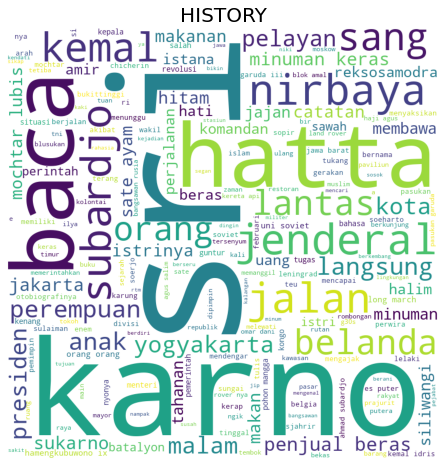

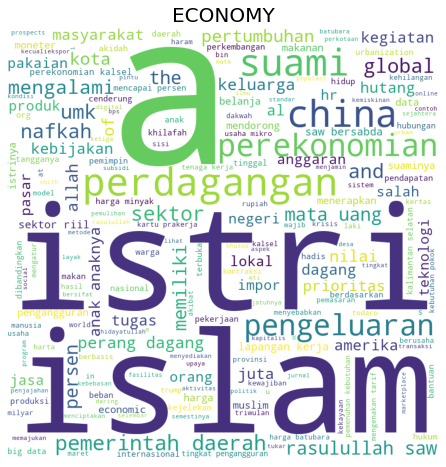

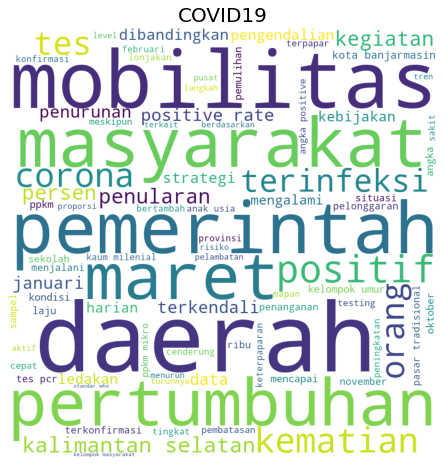

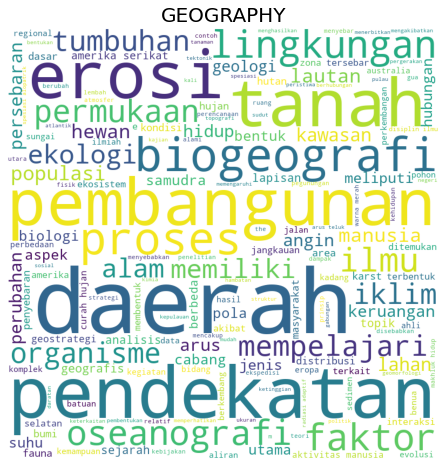

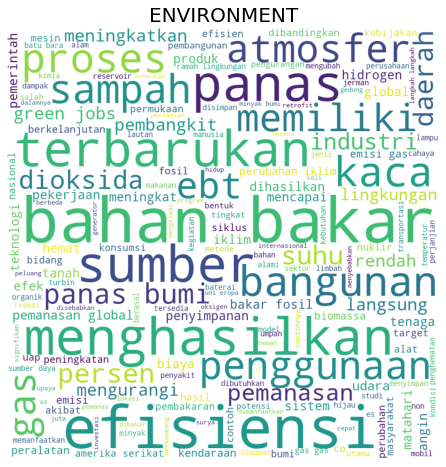

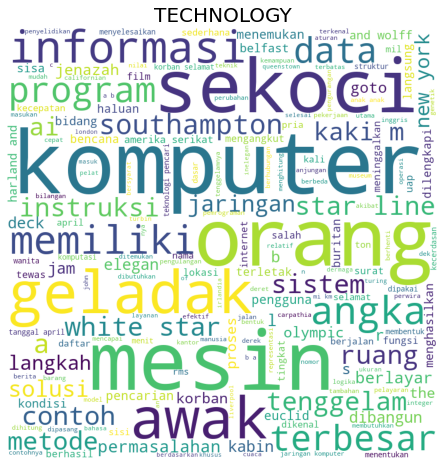

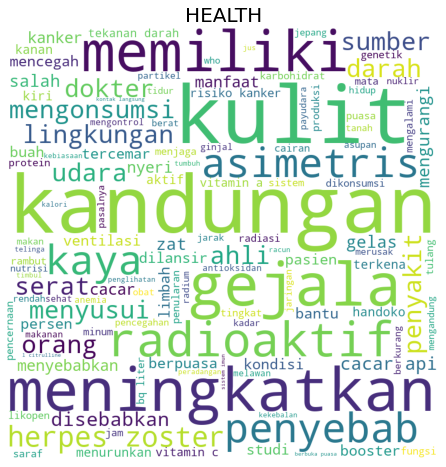

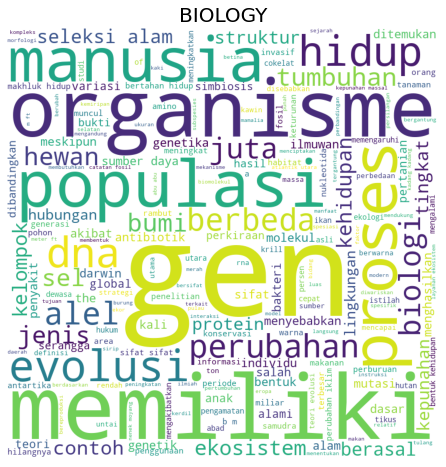

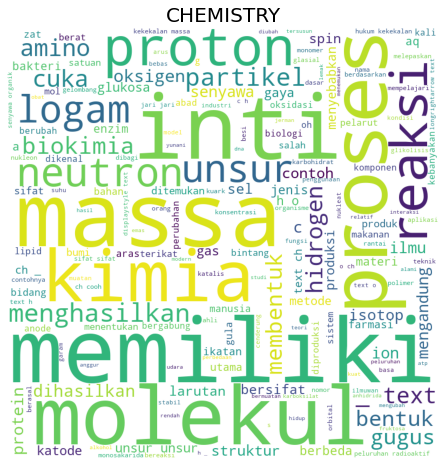

In [21]:
from wordcloud import WordCloud


for category in df_article['category'].unique():
    comment_words = ''

    for val in df_article[df_article['category']==category]['clean_text']:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(category.upper(),fontsize=20)

    plt.show()